In [1]:
import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
from lucid.optvis import objectives, param, render, transform
import matplotlib.pyplot as plt



512 1214.62


<img src="data:image/PNG;base64,iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAIAAABMXPacAACjDklEQVR4nAThVbClCYIg5v3M/B/mcxkzb3JmYVd3VzUP7dCyZyTLkmNDkv0i2w962AhH2OEIwYPktS0txmp2dhh6mosrK7OyEm9epsP4n58Z/X3gH3znd3w8yLOtb7bWaXI0x9EfvzxYkAlEo8G59g9/7/1/+T/+B0cqvnlnKbe0+upg4M1m7XpruVHwg87pq/MPtpdcDmaPzuB5OOeZqx49hkLs/mbvs33lbFDI1bzAcCAytnXLsDDmmwxwzjDFgT0l8nTljfbzf/mnbGWd5xn+Gvuf7c3Szrxb33zThbhMOPKzlVwFcBHAy6US/CXqXyv3Mu/8F3QRC2Pg44NTP65JAbexs//FsacIm9QNanoaff+BUA/7H/8pgf8+vKCFUm/jAfDh8a/02tv+C37NZwizf+VcwW+t/O7duxs57/Drf7NSWMWBgkHW/82//qLxwff+4t991XbtH/1f/95f/ouvUBj73f/q/tm//OuLJ1+++/3vFAQdv/k+DzGXB/NnJAizEi0Jvp+k+48Xr3/ZPz/BgVmBTTtaWkiSmyVi9T3xLEUfXvhqhBZx1Fy4KYyFQYZBoOo7xVYtapHgf/6f/D4vFFmupA66vIy7bDr0sMnY35CLeZGdjZ8whXxsYoXC0omh3mxKsT42zTMq8USmVEG9jpqdHIHKLH0y1oAogEGn+c3vOUODjSYckpVyuBLlY6HAl5lGLS/OFGWxGB6eLwrtMIPssyvxh3cmL1W7f1rbqyun54bu5AUAZbiWnMilipCw5bnB11cMJ0Bk6CJJFwB7f8NCFqdMvvXTywglQ65/guKaZ4PnSn7n9t2Ti3MwzSr5EV/55mJUBJJFf3L05g3Hz5Cz4zUZ6oF+ELtReXWpubFSKDnW6DxZWBiRr6/d04f7nlh49pPXj1873/kn3/7kLz+7d2P59s3iT/6f/+/7u9eWvvNOQvEOzI8708DSdZK1mxXHzvwXh+D+v5no5vvv1krrxAjKNf2omKlRdwDAwSUknzjQyFBdQOJhsAqbdKypNK+FoK0Ery8NRCqukuFivpjW9lY/f/zQjVORhx6sbEqpf3z8sh8kVSr8VnPlde+4KQij0/0CleyVMGcBZDD0+Dh8er5w5wxDN24u3eMgJRL40UylsgiHqBjwLq2Ciy8z0Ng4PoQuAFAqMax1+43ms549mqeCRNpfjKs861XKDJCKu9doLm+MzpXJ5KCXuCddisBW2Oh6OG9yQgxzzeZyOQKDOalkuTWAlkj0/OXriI59y2ErSwVAUkP3/mrOz6izkPX0lLQOtlstmKicGScEviEyThXQL2djmawPDAhTMZrwWWHN84EiCol4TNRbIClZm7OHj/an+4s3K9mygKYLe60uSqtrSSSRnEiY+sg0asu84ME+ARkY7PLxVRjtNYjNZayvTbqzoah4EoxgJKr3JuSDZm/aO9hfVHfkNc1MUfdlmAKOmlQq9Z38t/7hKiJBZAgSq6uCGml3bleeH+mKHUOXyo2yubZaY7KcH4fdACrmchVKgSk3R/uWQsyC0qsvPjMWiekXY6yFefpg/hwhQFQZlqC5QNNq7MPFlZCp49ND3O+2G5vtPCLiUrqwE2eag0icIl4f9BtrNw3rxLUPmtVNi23JELy8VAvWqEtPjMI4hWFDHbxUBxToVKlUH6sAh/ielkmiaqRNDANyFR/2Yc+FMI7Mt81O8Jk+3ypVqiiugYspgM1fP97czfcvUbbiKHbPw91qNdcNGntLq+14YXdNgOODiLxcAHQeBpASUyzuNOwf3gms+bONa8vlXCFSe2LjbuHGAxCKYDD2VDcHmb6KYHIzj0Ho2Pnrr7/qT7XdIhu5dhGMKmyIQCCiBjiKE4XigR1O5jFGcLdyUn16njaqIoSaSfRUJ/wC+mdfx8iTk7NGO3911r1UZzQOi7Xczt616bODj56rIO38/jc2aI47PD0qSpFiLhpciiXpKBL3n7wI9VQLaT3ExbSXoDCLxxQEgD5KiFXLvICEPCcww5NHhVD3pTbZXK0WfGDWB4EJClfg29f+9b96AidJAmqufZV4fn7zGs+09aNzInUjusJGmkfmT18dxEAE8PLPOv1vOE7zva2pbiGZiNoLMicCznTqBzMNQjKKhDzQfc2FaWVz42A8ynsEWWHeFehxeuOr3rxZqJyOh++3hf2uMVGZ1rXS6/3HXLEsN4skBAM85KKQPppLNRGO4NQm33u3cf7cq9c32LIUyxJaDYLJHJJhxHWTwKZoCIN4GIE4IstynhPbQlkkULBzbC5vorIMJHAcOLBBwrMwmvnqSPWKpFC1+wCJwoFdxmBOFq8murUPnZ9bSICm1nzCF0iJo6eKsziFC1Z/rwaRVK7Y3pu5EG2Nbm2mqTksyBkYhnq09NNnJ4Lj5tGKmgrvb95druIKG1GNBq5OnzwN9c7Xlqk3SlXPiWFjbqQhtSTduLftPH9EWKrMFpMIYxmiN+wty+0g8QbjTq29npPXj+cRjIf1VoFiqGcno1fPDkBcXKsIV68+yez4LCe3KYhDa4uJAoPCSXdYlIrVRo7D0GCqRYk9xCoCEXIgJi81ei7W7x8Xs8XQSnMMI0CUByEHo/Msw3fXpeHgdK+AJHiiK1GxzeEio2V26vmhvohpjOAZlGyt30Rxlg0jwnGjaLzgKkRmRm6C22ZESlWOZQDCy2I0A3F77hO+/aXukxyC01JWKmVxuIjMo0mySEGja6yQ7LaQII4V4OQmg2OJ/VnKEKz85UfDSnUZkeGswcREmWUkjC8UU00f9M5fvQrfu/N+my0N7EjgTEfXRAgk4igFhL/5aCQs5nel4nOjzvIVBPEO54N+JwuePbuxWyzdaNreWg4CFV1tAHnT8tw0+tHuhq4ueDDNM9zp/uLd337jLx8OsziMktif7XsJUlv5BogTC31xsyBwKFAgwl9edZRRUGozqPKCxoSeqQIAF4Spc/U0nyuZuper7xRL1asnF+64n7q+2Ly+JFdeXp7O5sH7XHakWXc31zX9eKSId5lsf+JViGilWNh/OZslkczhZDDtX8zz+SFw+9cACBfIMIVoEIU8TYdcxwlBVsxhYg4JPUfRtVh1R3GpuYL5KFtASCZ1XT1LIs8j/Aj4P/3++189/+zx/gt9aH14OeWiTOIpui6nSEYxBA6SWxJW9OwEhdspRCWujiLDceAigA9DS9s8srfNDBbgyal2dDkq1/Pfuy0thPSsQwPFuhO5t8pm4pmRGwgM7IfU0YFO+tn3t5dPB8TX0xmxsmSldiCVcGGwGwDtyB7GIdxCTQtFZjMHTFkM8l2YE1lMX1AM4PQXuVJFAfBnx+cYGEbeqYlSJLvSXK925i5hqtIq3aRnoaV+/fiCkGqVFhUPqVoOh4j35Dz82S8fP7hXNDBGaNVTQ/n8j/8McEwVpjdu7mpzz3eOWSmhMOUXJxHcqAa9M3b1BoUYl+MZQWrXauzx5QIptAAlKma0jfH0CqXb8OHz7rUGh7B8ZCYZEcMhmBIE6EeOYmQZmwUOBQHVspCAJQ9KIQpPBzNrEeGFLA4YmCoWi5iGZS0gczOCCi7OR1qDgfwgYjgIjGI3jgkcZqOQY0UkDQk0CWDxi2laoCMOy4ZlkLN05E9/9VJsb1Zy2HKzybvWH//Rl7ly8T/7+x+YpnKu2EXcYsmAo2UyM+ddczSCbgj5USD+u6OvLJSj7qwkUB+J0+t4+71Ud0MAhwOFR+eZCuCklUVpaDLkcoElgokxo/C5mq20icOegtjzHIVaUcjiVKlSCaMoidV10StxEOzPX/6iB6ZYu9yCEs/l+SJUuL6U//Bv/pf7b1wbXqbEMn764gy4fOmFgVhl6/WCybGpMU0hnufbsTJ5623+2at+SpcmY0cAzPIyq52d93qOEvEyYa4JTGg6BsoGNMUQTmRceYtlCUeh
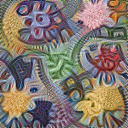

In [4]:
### Sanity check for lucid_tests install
model = models.InceptionV1()
model.load_graphdef()

# rendered
_ = render.render_vis(model, 'mixed4a_pre_relu:476')

# plt.imshow(rendered)



### Import custom model
